In [61]:
include("../modules/IVTmodel.jl")

plotintegralIPFR (generic function with 1 method)

In [9]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT2()
#Imports calibration data from csv files
modeldata = importakamadata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
akamafittedparameterslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
akamafittedcovariancematrix = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
akamafittedparams = fullparameterset(fittingmodel,akamafittedparameterslist)
printresidual(fittingmodel,modeldata,akamafittedparameterslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 14 fitted parameters, 10 of which have a bayesian prior
Total Residual:                        776.7
Components of residual:
Concentration Trajectories (Figure 2): 314.3
Initial Reaction Rate (Figure 3A):     169.7
Mg2PPi solubility (Figure 3B):         214.1
Parameter priors:                      78.6


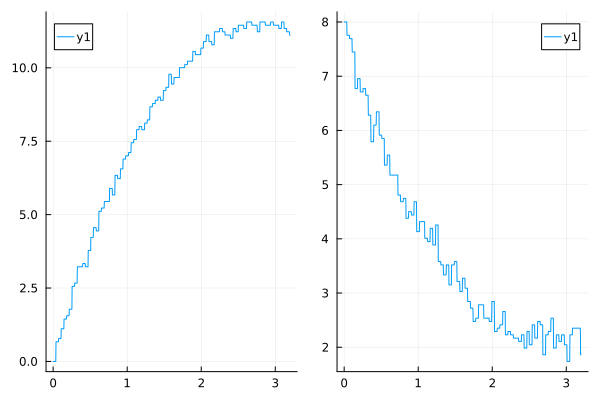

In [66]:
ts = LinRange(0,3.2,1000)
RNAvalues = [discreteIVT(t)[1] for t in ts]
ATPvalues = [discreteIVT(t)[2] for t in ts]
plt1 = plot(ts,RNAvalues)
plt2 = plot(ts,ATPvalues)
plot(plt1,plt2)

In [89]:
plt1 = plot(label = "Sensor Data",ylabel = "Total RNA (μM)",xlabel = "Time (h)",legend = :outerbottom)
plt2 = plot(label = "",legend = :outerbottom,ylabel = "ATP (mM)",xlabel = "Time (h)")
inputs = (T7RNAP = 240e-9, ATP = 8e-3,UTP = 8e-3,CTP = 8e-3,GTP = 8e-3, Mg = 26e-3, Buffer = 0.040, DNA = 19.442, final_time = 3.2)
PPiase = 0.02
Cap = 4e-3
stoich = (531,309,692,588)

sol = runobservedbatch(akamafittedparams, inputs,[0.0,0.0],discreteIVT,PPiase = PPiase, stoich = stoich)
plot!(plt1,sol.t,totalrna(sol,0),linewidth = 3, label = "Model - No observer")
plot!(plt2,sol.t,atp(sol,0),linewidth = 3, label = "Model - No observer")

sol = runobservedbatch(akamafittedparams, inputs,[2e-5,2e-3],discreteIVT,PPiase = PPiase, stoich = stoich)
plot!(plt1,sol.t,totalrna(sol,0),linewidth = 3, label = "Model - Moderate tuning")
plot!(plt2,sol.t,atp(sol,0),linewidth = 3, label = "Model - Moderate tuning")

sol = runobservedbatch(akamafittedparams, inputs,[2e-4,2e-2],discreteIVT,PPiase = PPiase, stoich = stoich)
plot!(plt1,sol.t,totalrna(sol,0),linewidth = 3, label = "Model - Strong tuning")
plot!(plt2,sol.t,atp(sol,0),linewidth = 3, label = "Model - Strong tuning")

scatter!(plt1,ts,RNAvalues,markersize = 0.2)
scatter!(plt2,ts,ATPvalues,markersize = 0.2)

fullplot = plot(plt1,plt2, size = (800,400),bottommargin = 5mm,leftmargin = 5mm,dpi = 2000)
savefig(fullplot,"../figures/pHobserver.png")
fullplot

In [59]:
function discreteIVT(t)
    time = [0.03666666666666667, 0.07166666666666666, 0.10833333333333334, 0.145, 0.18166666666666667, 0.21666666666666667, 0.2533333333333333, 0.29, 0.32666666666666666, 0.36166666666666664, 0.3983333333333333, 0.435, 0.4716666666666667, 0.5066666666666666, 0.5433333333333333, 0.58, 0.6166666666666667, 0.6533333333333333, 0.69, 0.725, 0.7616666666666667, 0.7983333333333333, 0.835, 0.87, 0.9066666666666666, 0.9433333333333334, 0.98, 1.0166666666666666, 1.0516666666666667, 1.0883333333333334, 1.125, 1.16, 1.1966666666666665, 1.2333333333333334, 1.27, 1.3066666666666666, 1.3416666666666666, 1.3783333333333334, 1.415, 1.45, 1.4866666666666668, 1.5233333333333334, 1.5599999999999998, 1.5966666666666667, 1.6316666666666668, 1.6683333333333332, 1.7049999999999998, 1.74, 1.7766666666666666, 1.8133333333333332, 1.8499999999999999, 1.8866666666666667, 1.9216666666666666, 1.9583333333333333, 1.995, 2.03, 2.0666666666666664, 2.1033333333333335, 2.14, 2.175, 2.2116666666666664, 2.2483333333333335, 2.2849999999999997, 2.3216666666666668, 2.356666666666667, 2.393333333333333, 2.43, 2.466666666666667, 2.5016666666666665, 2.5383333333333336, 2.575, 2.6116666666666664, 2.646666666666667, 2.683333333333333, 2.7199999999999998, 2.756666666666667, 2.7916666666666665, 2.828333333333333, 2.865, 2.9016666666666664, 2.9366666666666665, 2.9733333333333336, 3.01, 3.046666666666667, 3.0816666666666666, 3.118333333333333, 3.1550000000000002, 3.1916666666666664, 3.2266666666666666]
    RNA = [0.0, 0.66696, 0.77812, 1.1116, 1.44508, 1.55624, 1.77856, 2.55668, 2.66784, 3.2236399999999996, 3.2236399999999996, 3.3348, 3.2236399999999996, 3.77944, 4.22408, 4.55756, 4.4464, 5.11336, 5.224519999999999, 5.44684, 5.44684, 5.8914800000000005, 5.66916, 6.336119999999999, 6.22496, 6.558439999999999, 6.89192, 7.00308, 7.11424, 7.44772, 7.55888, 7.892359999999999, 8.00352, 7.892359999999999, 8.11468, 8.22584, 8.67048, 8.78164, 8.8928, 9.003960000000001, 8.8928, 9.22628, 9.337439999999999, 9.78208, 9.448599999999999, 9.670919999999999, 9.670919999999999, 10.0044, 10.0044, 10.11556, 10.22672, 10.22672, 10.5602, 10.449039999999998, 10.449039999999998, 10.67136, 10.89368, 11.116, 10.89368, 10.78252, 11.22716, 11.22716, 11.33832, 11.22716, 11.116, 11.116, 11.00484, 11.33832, 11.22716, 11.44948, 11.44948, 11.33832, 11.56064, 11.56064, 11.44948, 11.44948, 11.22716, 11.56064, 11.56064, 11.44948, 11.44948, 11.56064, 11.44948, 11.44948, 11.33832, 11.56064, 11.33832, 11.22716, 11.116]
    ATP = [8.0, 7.7544508670520225, 7.693063583815029, 7.447514450867052, 6.772254335260116, 6.956416184971098, 6.710867052023121, 6.772254335260116, 6.649479768786128, 6.281156069364162, 5.790057803468208, 6.096994219653179, 6.342543352601155, 5.912832369942197, 5.851445086705202, 5.360346820809248, 5.544508670520231, 5.176184971098266, 5.176184971098266, 5.176184971098266, 4.8078612716763, 4.685086705202313, 4.7464739884393055, 4.3781502890173405, 4.500924855491329, 4.439537572254335, 4.685086705202313, 4.132601156069364, 4.316763005780347, 4.316763005780347, 4.0098265895953755, 3.9484393063583814, 4.193988439306358, 3.887052023121387, 4.255375722543352, 3.580115606936416, 3.518728323699422, 3.334566473988439, 3.518728323699422, 3.1504046242774564, 3.518728323699422, 3.580115606936416, 3.2117919075144505, 3.027630057803468, 3.2731791907514447, 3.089017341040462, 2.843468208092485, 2.720693641618497, 2.47514450867052, 2.536531791907514, 2.782080924855491, 2.782080924855491, 2.536531791907514, 2.536531791907514, 2.47514450867052, 2.843468208092485, 2.2909826589595372, 2.3523699421965314, 2.4137572254335256, 2.6593063583815026, 2.229595375722543, 2.2909826589595372, 2.229595375722543, 2.168208092485549, 2.168208092485549, 2.1068208092485547, 2.229595375722543, 1.9840462427745662, 2.2909826589595372, 2.04543352601156, 2.4137572254335256, 2.168208092485549, 2.47514450867052, 2.4137572254335256, 1.8612716763005777, 2.229595375722543, 2.2909826589595372, 2.536531791907514, 1.9840462427745662, 2.229595375722543, 2.1068208092485547, 2.229595375722543, 2.04543352601156, 1.7384971098265891, 2.229595375722543, 2.3523699421965314, 2.3523699421965314, 2.3523699421965314, 1.8612716763005777]
    UTP = [8.0, 7.785664739884393, 7.714219653179191, 7.571329479768786, 7.642774566473989, 7.535606936416185, 7.571329479768786, 7.249826589595376, 7.178381502890174, 7.178381502890174, 7.178381502890174, 6.8926011560693645, 6.785433526011561, 6.928323699421965, 6.713988439306359, 6.856878612716763, 6.642543352601156, 6.4996531791907515, 6.4996531791907515, 6.213872832369942, 6.285317919075144, 6.213872832369942, 6.0352601156069365, 6.178150289017341, 5.963815028901734, 5.820924855491329, 5.892369942196532, 5.678034682080924, 5.713757225433525, 5.713757225433525, 5.678034682080924, 5.570867052023122, 5.427976878612717, 5.678034682080924, 5.463699421965318, 5.320809248554913, 5.1779190751445086, 5.285086705202312, 5.070751445086705, 5.1779190751445086, 5.070751445086705, 5.1779190751445086, 5.070751445086705, 5.106473988439307, 5.070751445086705, 4.9278612716763, 4.963583815028902, 4.7849710982658955, 4.9278612716763, 4.749248554913295, 4.749248554913295, 4.677803468208093, 4.570635838150289, 4.677803468208093, 4.713526011560694, 4.7849710982658955, 4.642080924855491, 4.642080924855491, 4.60635838150289, 4.392023121387283, 4.463468208092485, 4.570635838150289, 4.499190751445086, 4.28485549132948, 4.534913294797688, 4.392023121387283, 4.427745664739884, 4.356300578034682, 4.28485549132948, 4.463468208092485, 4.213410404624278, 4.356300578034682, 4.642080924855491, 4.427745664739884, 4.392023121387283, 4.642080924855491, 4.463468208092485, 4.499190751445086, 4.28485549132948, 4.320578034682081, 4.427745664739884, 4.499190751445086, 4.427745664739884, 4.463468208092485, 4.356300578034682, 4.534913294797688, 4.427745664739884, 4.463468208092485, 4.427745664739884]
    CTP = [8.0, 7.84, 7.6, 6.96, 6.72, 6.16, 6.24, 6.48, 5.76, 5.76, 5.28, 5.6, 4.88, 4.88, 5.28, 4.8, 4.0, 3.68, 3.76, 3.6, 4.16, 3.92, 3.36, 4.0, 2.88, 2.8, 2.48, 2.4, 3.36, 1.92, 3.04, 2.24, 2.24, 2.0, 1.92, 2.32, 1.84, 1.52, 1.92, 1.6, 0.96, 1.52, 0.96, 1.52, 1.04, 1.04, 0.32, 0.8, 0.8, 0.64, 0.72, 0.4, 0.64, 0.32, 0.16, 0.4, -0.08, 0.0, -0.08, 0.0, 0.16, 0.16, -0.32, 0.0, -0.48, -0.24, 0.16, -0.32, -0.4, -0.08, -0.24, -0.4, -0.8, -0.32, -0.48, 0.0, 0.24, -0.32, -0.8, 0.16, 0.0, -0.32, -0.24, 0.08, -0.16, -0.24, -0.32, 0.0, 0.0]
    GTP = [8.0, 7.184277456647399, 6.368554913294798, 6.368554913294798, 5.824739884393064, 4.601156069364162, 4.941040462427746, 5.756763005780347, 5.552832369942196, 4.261271676300579, 5.960693641618497, 5.960693641618497, 5.076994219653178, 5.620809248554914, 5.280924855491329, 4.601156069364162, 4.3292485549132955, 4.261271676300579, 5.212947976878612, 4.601156069364162, 4.3292485549132955, 3.17364161849711, 3.3095953757225436, 4.193294797687861, 3.989364161849711, 3.2416184971098265, 3.1056647398843937, 4.057341040462427, 2.4938728323699424, 3.717456647398844, 2.018034682080925, 2.221965317919075, 2.6298265895953756, 2.561849710982659, 2.018034682080925, 2.8337572254335264, 0.8624277456647402, 1.8141040462427749, 1.6781502890173414, 1.4062427745664743, 1.6101734104046246, 3.37757225433526, 1.5421965317919077, 1.202312138728324, 0.7264739884393066, 1.746127167630058, 0.930404624277457, 0.45456647398843963, 1.6101734104046246, -0.22520231213872788, 0.5225433526011564, 0.2506358381502892, 1.9500578034682083, 0.2506358381502892, 0.5225433526011564, 0.31861271676300607, 1.5421965317919077, 0.6584971098265899, 0.8624277456647402, 0.8624277456647402, 0.6584971098265899, 0.31861271676300607, -0.02127167630057758, -0.7010404624277455, 0.7264739884393066, 0.45456647398843963, 0.04670520231213904, -0.02127167630057758, 1.4062427745664743, 0.8624277456647402, 0.5225433526011564, -0.2931791907514447, 0.2506358381502892, 1.0663583815028905, 0.6584971098265899, -0.497109826589595, 0.930404624277457, 1.0663583815028905, 0.2506358381502892, 0.11468208092485588, -0.6330635838150287, -0.7010404624277455, 1.0663583815028905, 0.5225433526011564, 0.8624277456647402, -0.22520231213872788, 0.5225433526011564, 0.9983815028901737, 1.202312138728324]
    IVTdata = hcat(RNA,ATP,UTP,CTP,GTP)
    return IVTdata[sum(time .< t)+1,:]
end

discreteIVT (generic function with 1 method)